<a href="https://colab.research.google.com/github/thitiwat05/229352-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/229351-LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-10 14:51:30--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-10 14:51:31 (43.2 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

Unnamed: 0  value
time                         
1996-01-01           1  79.35
1996-02-01           2  75.78
1996-03-01           3  86.32
1996-04-01           4  72.60
1996-05-01           5  74.86
...                ...    ...
2011-11-01         191  93.37
2011-12-01         192  98.34
2012-01-01         193  86.44
2012-02-01         194  85.04
2012-03-01         195  97.80

[195 rows x 2 columns]

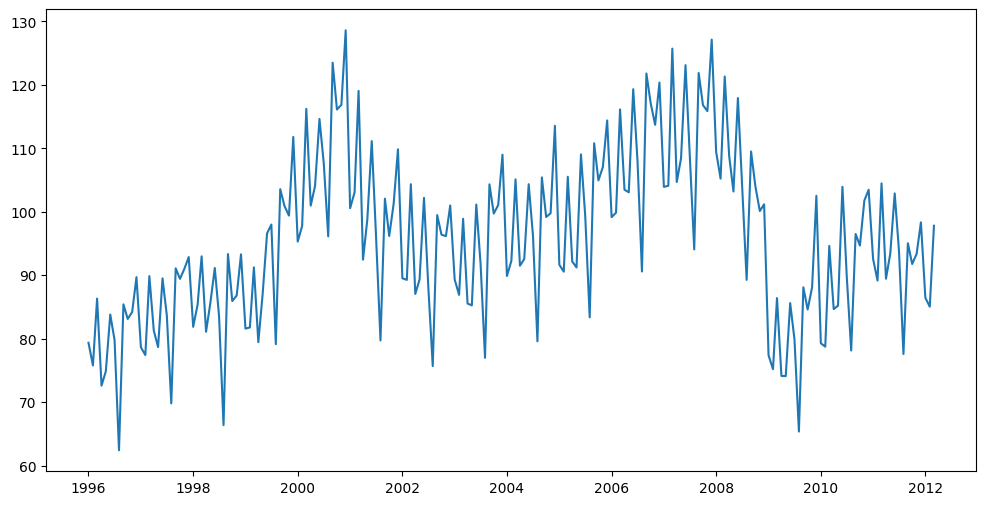

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [5]:
# subsetting data at specified date

data

Unnamed: 0  value
time                         
1996-01-01           1  79.35
1996-02-01           2  75.78
1996-03-01           3  86.32
1996-04-01           4  72.60
1996-05-01           5  74.86
...                ...    ...
2011-11-01         191  93.37
2011-12-01         192  98.34
2012-01-01         193  86.44
2012-02-01         194  85.04
2012-03-01         195  97.80

[195 rows x 2 columns]

In [6]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

Unnamed: 0  value
time                         
1996-01-01         1.0  79.35
1996-02-01         2.0  75.78
1996-03-01         3.0  86.32
1996-04-01         4.0  72.60
1996-05-01         5.0  74.86
...                ...    ...
2011-12-01       192.0  98.34
2012-01-01       193.0  86.44
2012-02-01       194.0  85.04
2012-03-01       195.0  97.80
2012-03-02         NaN  86.00

[196 rows x 2 columns]

# Moving average

In [7]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

Unnamed: 0  value      MA
time                                 
1996-01-01         1.0  79.35     NaN
1996-02-01         2.0  75.78     NaN
1996-03-01         3.0  86.32  77.782
1996-04-01         4.0  72.60  78.674
1996-05-01         5.0  74.86  79.478
1996-06-01         6.0  83.81  74.696
1996-07-01         7.0  79.80  77.258
1996-08-01         8.0  62.41  78.908
1996-09-01         9.0  85.41  78.988
1996-10-01        10.0  83.11  80.968
1996-11-01        11.0  84.21  84.214
1996-12-01        12.0  89.70  82.616

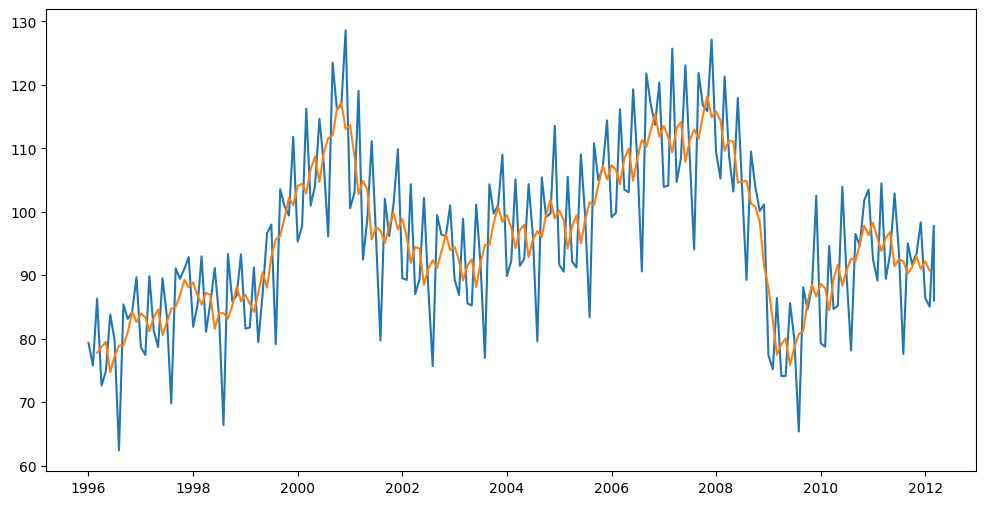

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

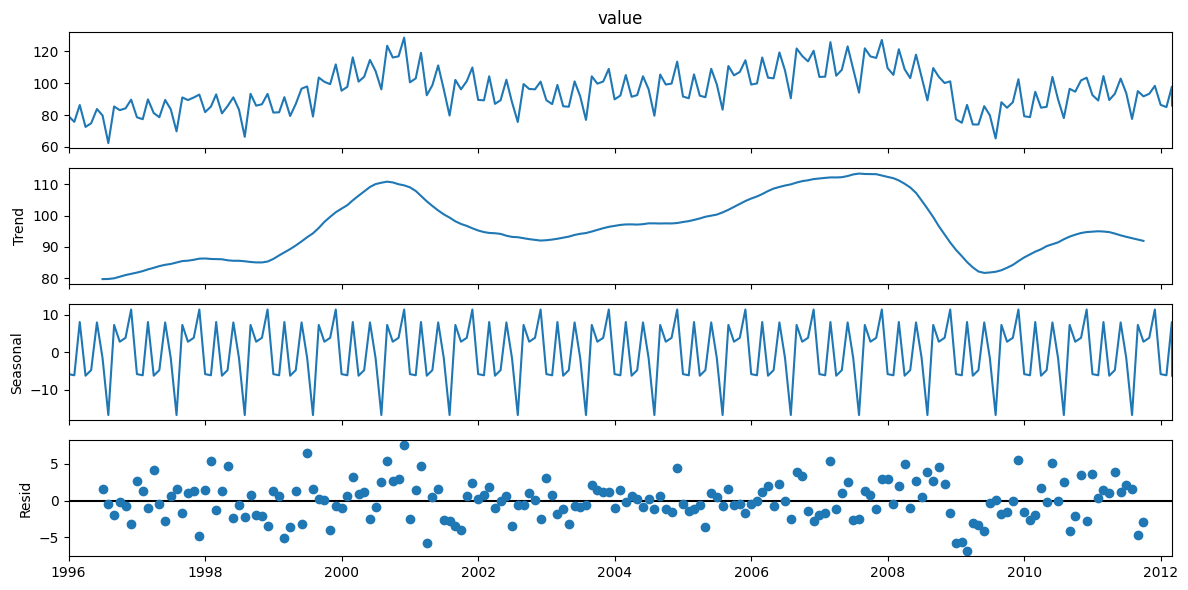

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period=12)

result_add.plot();

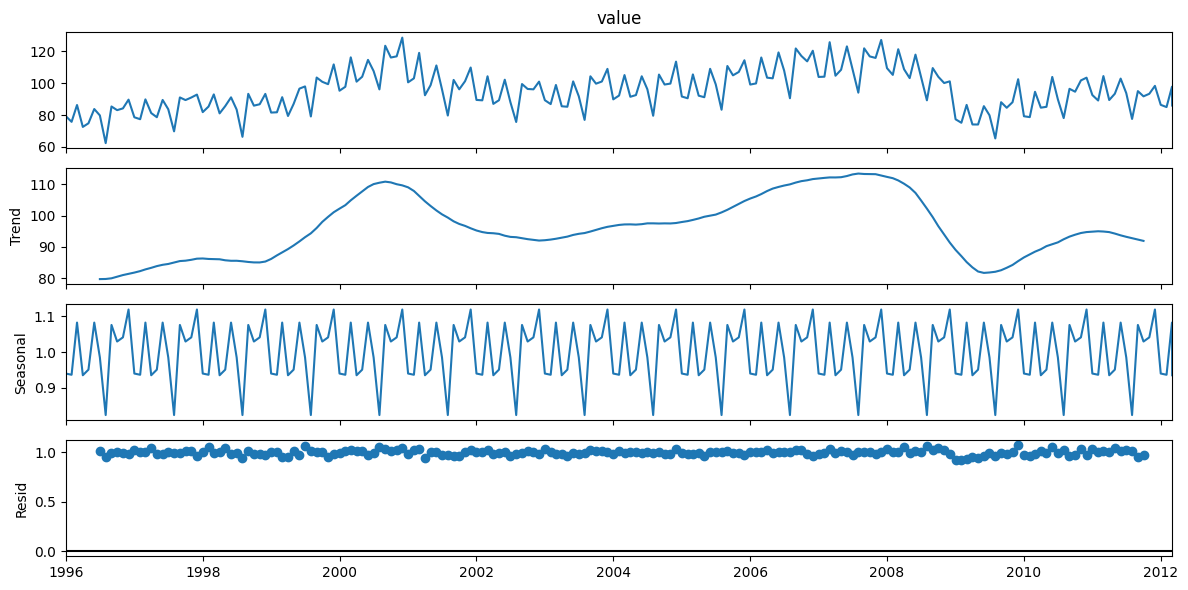

In [16]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [17]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [19]:
data.loc['1996-01-01':'2009-12-01']

Unnamed: 0   value      MA
time                                  
1996-01-01         1.0   79.35     NaN
1996-02-01         2.0   75.78     NaN
1996-03-01         3.0   86.32  77.782
1996-04-01         4.0   72.60  78.674
1996-05-01         5.0   74.86  79.478
...                ...     ...     ...
2009-08-01       164.0   65.36  80.712
2009-09-01       165.0   88.09  81.208
2009-10-01       166.0   84.60  85.732
2009-11-01       167.0   88.09  88.516
2009-12-01       168.0  102.52  86.646

[168 rows x 3 columns]

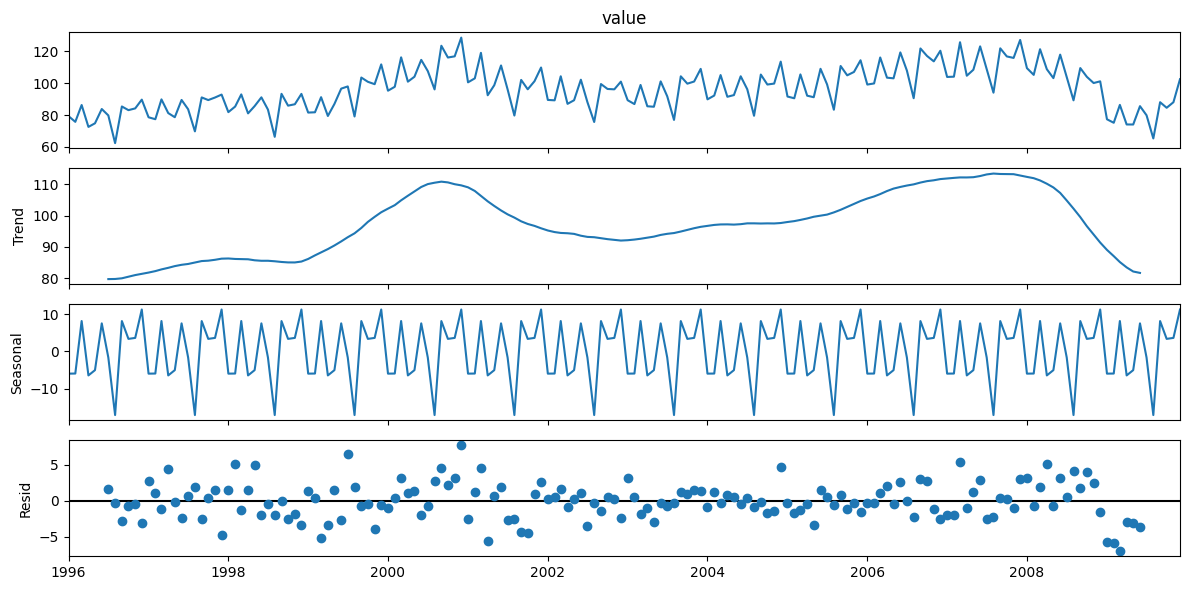

In [25]:
result_add = seasonal_decompose(data.loc['1996-01-01':'2009-12-01', 'value'], model='additive', period=12)
result_add.plot();

In [26]:
data.loc['2010-01-01':'2012-03-01']

Unnamed: 0   value      MA
time                                  
2010-01-01       169.0   79.28  88.650
2010-02-01       170.0   78.74  87.964
2010-03-01       171.0   94.62  84.500
2010-04-01       172.0   84.66  89.432
2010-05-01       173.0   85.20  91.658
2010-06-01       174.0  103.94  88.362
2010-07-01       175.0   89.87  90.730
2010-08-01       176.0   78.14  92.626
2010-09-01       177.0   96.50  92.192
2010-10-01       178.0   94.68  94.914
2010-11-01       179.0  101.77  97.800
2010-12-01       180.0  103.48  96.332
2011-01-01       181.0   92.57  98.292
2011-02-01       182.0   89.16  95.828
2011-03-01       183.0  104.48  93.812
2011-04-01       184.0   89.45  95.878
2011-05-01       185.0   93.40  96.800
2011-06-01       186.0  102.90  91.420
2011-07-01       187.0   93.77  92.538
2011-08-01       188.0   77.58  92.212
2011-09-01       189.0   95.04  90.306
2011-10-01       190.0   91.77  91.220
2011-11-01       191.0   93.37  92.992
2011-12-01       192.0   98.34  90.992
2012-01-01       193.0   86.44  92.198
2012-02-01       194.0   85.04  90.724
2012-03-01       195.0   97.80     NaN

In [41]:
result_test = seasonal_decompose(data.loc['2010-01-01':'2012-03-01', 'value'], model='additive', period=12)
last_trend = result_test.trend.dropna().iloc[-1]
last_resid = result_test.resid.dropna().iloc[-1]
last_TR = last_trend + last_resid
seasonal_test = result_test.seasonal
ts_new = seasonal_test + last_TR
print(ts_new)

time
2010-01-01     89.800833
2010-02-01     86.251667
2010-03-01    101.655833
2010-04-01     86.807917
2010-05-01     91.229167
2010-06-01    101.293333
2010-07-01     91.567917
2010-08-01     77.327500
2010-09-01     95.040000
2010-10-01     92.869583
2010-11-01     99.418333
2010-12-01    100.830000
2011-01-01     89.800833
2011-02-01     86.251667
2011-03-01    101.655833
2011-04-01     86.807917
2011-05-01     91.229167
2011-06-01    101.293333
2011-07-01     91.567917
2011-08-01     77.327500
2011-09-01     95.040000
2011-10-01     92.869583
2011-11-01     99.418333
2011-12-01    100.830000
2012-01-01     89.800833
2012-02-01     86.251667
2012-03-01    101.655833
Name: seasonal, dtype: float64


In [52]:
def rmse(y_true,y_pred):
  y_true = np.array(result_test)
  y_pred = np.array(ts_new)
  rmse = rmse(y_true,y_pred)
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

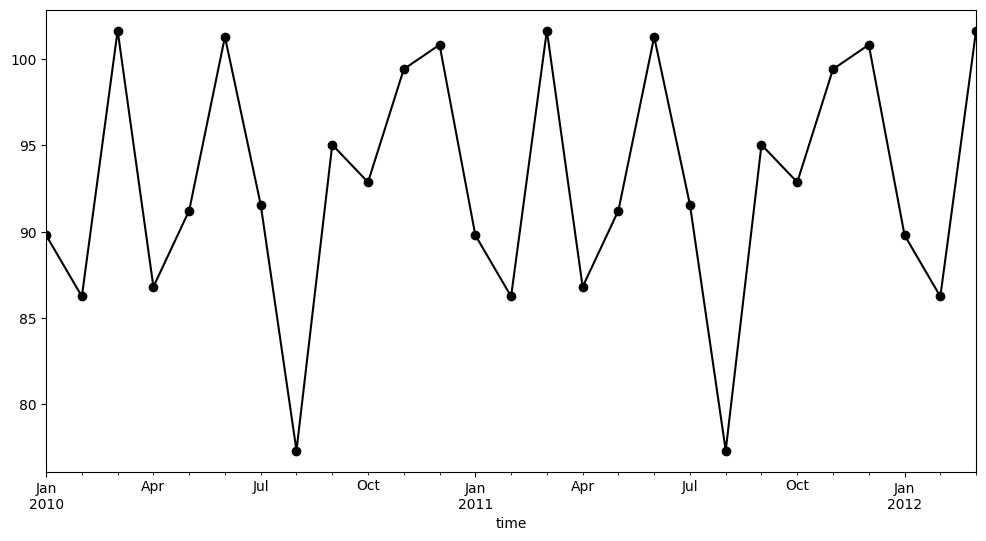

In [45]:
ax = ts_new.plot(marker='o', color='black', figsize=(12,6))